# Juventus Players With More Than 100 Games Data Analysis

- [dataset](https://www.kaggle.com/datasets/mitsuyasuhoshino/juventus-fc-legends/data)


In [1]:
# First we unzip the file to export the dataset
import zipfile
import os


for file in os.listdir(os.curdir):
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall()

In [2]:
# Reading the dataset
import pandas as pd

for file in os.listdir(os.curdir):
    if file.endswith(".csv"):
        df = pd.read_csv(file)

df
        

,name,nationality,positions,period of enrollment,appearances,goals
0,Angelo Alessio,Italy,MF,1987-1992,142,21
1,Jose Altafini,Brazil/Italy,FW,1972-1976,117,37
2,Amauri,Brazil/Italy,FW,2008-2011,100,24
3,Nicola Amoruso,Italy,FW,1996-2002,105,29
4,Pietro Anastasi,Italy,FW,1968-1976,307,132
...,...,...,...,...,...,...
162,Gianluca Zambrotta,Italy,DF,1999-2006,297,10
163,Jonathan Zebina,France,DF,2004-2010,117,1
164,Zinedine Zidane,France,MF,1996-2001,212,31
165,Gianfranco Zigoni,Italy,FW,1961-1970,125,36


## Data Cleaning

Let's first check if there are duplicated rows and drop them

df.drop_duplicates(inplace=True)
df

We see that there are not any duplicated rows. Next, we want to change `Kingdom of Italy` to `Italy`, so It is more consistant.

In [3]:
koi_df = df.loc[df['nationality'].str.contains('Kingdom of Italy')]
koi_df

,name,nationality,positions,period of enrollment,appearances,goals
8,Oreste Barale,Kingdom of Italy,MF,1924-1931,116,1
10,Savino Bellini,Kingdom of Italy,FW,1937-1944,126,34
15,Luigi Bertolini,Kingdom of Italy,MF,1930-1937,161,5
18,Carlo Bigatto,Kingdom of Italy,MF,1913-1931,243,2
24,Felice Borel,Kingdom of Italy,FW,"1932-1941, 1942-1946",308,163
29,Umberto Caligaris,Kingdom of Italy,DF,1928-1935,198,0
37,Renato Cesarini,Argentina/Kingdom of Italy,FW,1929-1935,147,53
42,Gianpiero Combi,Kingdom of Italy,GK,1921-1934,369,0
56,Teobaldo Depetrini,Kingdom of Italy,MF,1933-1949,388,10
65,Giovanni Ferrari,Kingdom of Italy,FW,1930-1942,193,78


In [4]:
# Replace 'Kingdom of Italy' with 'Italy' in the 'nationality' column
df.loc[koi_df.index, 'nationality'] = df.loc[koi_df.index, 'nationality'].str.replace('Kingdom of Italy', 'Italy')

In [5]:
# Now Let's check on of the players
result = df[df['name'] == 'Renato Cesarini']
result

,name,nationality,positions,period of enrollment,appearances,goals
37,Renato Cesarini,Argentina/Italy,FW,1929-1935,147,53


We see that `Kingdom of Italy` is changed to `Italy`

## Data Analysis

### Most Appearances

In [6]:
# Let's take a look at 10 players with most appearances for Juventus

most_app = df.sort_values('appearances', ascending=False).head(10)
most_app

,name,nationality,positions,period of enrollment,appearances,goals
54,Alessandro Del Piero,Italy,FW,1993-2012,705,290
26,Gianluigi Buffon,Italy,GK,"2001-2018, 2019-2021",685,0
39,Giorgio Chiellini,Italy,DF,2005-2022,561,36
138,Gaetano Scirea,Italy,DF,1974-1988,550,32
68,Giuseppe Furino,Italy,MF,1969-1984,528,19
23,Leonardo Bonucci,Italy,DF,"2010-2017, 2018-",502,35
17,Roberto Bettega,Italy,FW,1970-1983,482,179
166,Dino Zoff,Italy,GK,1972-1983,473,0
22,Giampiero Boniperti,Italy,FW,1946-1961,465,185
27,Antonio Cabrini,Italy,DF,1976-1989,460,52


As we all know Juventus Legened Alex Del Piero had the most appearances for the club, following by Buffon and Chiellini. One fact that we can consider is that there are no foreign players among these players and all of them are from Italy.

### Non-Italian Most Appearances

In [7]:
non_italian_df = df.loc[~df['nationality'].str.contains('Italy')]
most_app_non_it = non_italian_df.sort_values('appearances', ascending=False).head(10)
most_app_non_it

,name,nationality,positions,period of enrollment,appearances,goals
110,Pavel Nedved,Czech Republic,MF,2001-2009,327,65
151,David Trezeguet,France,FW,2000-2010,320,171
46,Juan Cuadrado,Colombia,MF,2015-2023,314,26
135,Alex Sandro,Brazil,DF,2015-,309,15
21,Massimo Bonini,San Marino,MF,1981-1989,301,6
55,Luis del Sol,Spain,MF,1962-1970,300,31
60,Paulo Dybala,Argentina,FW,2015-2022,293,115
103,Paolo Montero,Uruguay,DF,1996-2005,278,7
89,Stephan Lichtsteiner,Switzerland,DF,2011-2018,257,15
49,Edgar Davids,Netherlands,MF,1997-2004,235,10


We can see that Pavel Nedved had played the most games for Juventus as a foregin player. Also Alex Sandro in the 4th place is noticeable, because he is the only active player in the list and might steal the first place from Nedved in the future if he continues to play.

### Nationality of Players


In [9]:
number_of_countries = df['nationality'].nunique()
countries = df['nationality'].unique()
print(f"Number of Countries: {number_of_countries}")
print(f"Countries: {countries}")

Number of Countries: 23
Countries: ['Italy' 'Brazil/Italy' 'Ghana' 'Uruguay' 'Poland' 'San Marino'
 'Argentina/Italy' 'Wales' 'Brazil' 'Colombia' 'Netherlands' 'Spain'
 'France' 'Argentina' 'Czech Republic' 'Germany' 'Denmark' 'Switzerland'
 'Croatia' 'Bosnia and Herzegovina' 'Portugal' 'Mali/France' 'Chile']


We can see that there are 23 different countries, which mostly are from Europe and South America. However, we can see that Ghana and Mali are mentioned. So let's take a look at those players:

In [10]:
african_players = df.loc[df['nationality'].isin(['Ghana', 'Mali/France'])]
african_players

,name,nationality,positions,period of enrollment,appearances,goals
6,Kwadwo Asamoah,Ghana,MF,2012-2018,156,5
141,Mohamed Sissoko,Mali/France,MF,2008-2011,100,3


It is shown that there are only two Afrian players with more than 100 goals for juventus. Kwadwo Asamoah and Mohamed Sissoko.

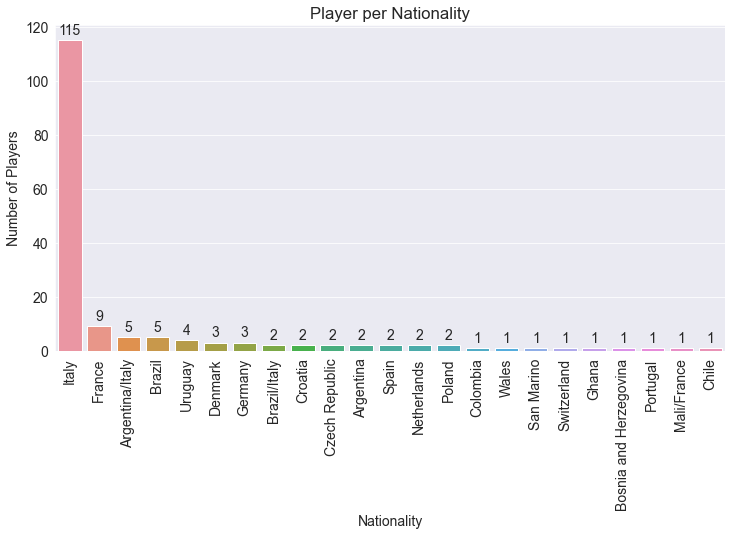

In [18]:
# Now let's plot the distributaion of countries

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title("Player per Nationality")
plt.xlabel("Nationality")

player_per_nationality = df['nationality'].value_counts()

ax = sns.barplot(x=player_per_nationality.index, y=player_per_nationality)

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.ylabel("Number of Players")
# Display the plot
plt.show()

As it's shown it's clear that Italian players hold the 1st place strongly and then there is Fracne. It's nice to mention that players with double country like Argentina/Italy are the 3rd place.

### Players with two nationalities

In [22]:
# We saw earlier that some players had more than one nationality. So let's take a look at them.

double_nat_players_df = df.loc[df['nationality'].str.contains("/")]
double_nat_players_df = double_nat_players_df.sort_values('appearances', ascending=False)
double_nat_players_df

,name,nationality,positions,period of enrollment,appearances,goals
30,Mauro Camoranesi,Argentina/Italy,MF,2002-2010,288,32
104,Luis Monti,Argentina/Italy,MF,1930-1939,263,22
142,Omar Sivori,Argentina/Italy,FW,1957-1965,259,174
112,Raimundo Orsi,Argentina/Italy,FW,1929-1935,194,88
37,Renato Cesarini,Argentina/Italy,FW,1929-1935,147,53
1,Jose Altafini,Brazil/Italy,FW,1972-1976,117,37
2,Amauri,Brazil/Italy,FW,2008-2011,100,24
141,Mohamed Sissoko,Mali/France,MF,2008-2011,100,3


We can see that there are 8 players with double nationalities and more than half of them are Argentinian/Italian. It's fun to say that the only player that Italy is not among his nationalities is Mohamed Sissoko with Mali/France nationality.

### Player Goals

In [27]:
# Players with most goals

most_goal_players = df.sort_values('goals', ascending=False).head(10)
most_goal_players

,name,nationality,positions,period of enrollment,appearances,goals
54,Alessandro Del Piero,Italy,FW,1993-2012,705,290
22,Giampiero Boniperti,Italy,FW,1946-1961,465,185
17,Roberto Bettega,Italy,FW,1970-1983,482,179
142,Omar Sivori,Argentina/Italy,FW,1957-1965,259,174
151,David Trezeguet,France,FW,2000-2010,320,171
24,Felice Borel,Italy,FW,"1932-1941, 1942-1946",308,163
4,Pietro Anastasi,Italy,FW,1968-1976,307,132
77,John Hansen,Denmark,FW,1948-1954,189,124
60,Paulo Dybala,Argentina,FW,2015-2022,293,115
7,Roberto Baggio,Italy,FW,1990-1995,200,115


As we all know Alex Del piero not only had played the most games, but also had scored the most goals for the Juventus with more than 100 goals above the second player. We can also notice Paulo Dybaa who is the most recent player among the list. In addition, we can see that all of these players were attacking(Forwrad) players.

In [28]:
# Now let's take a look at players with most goals in other positions

positions_list = df['positions'].unique()
positions_list

array(['MF', 'FW', 'GK', 'DF'], dtype=object)

There are 4 different positions: GoalKeeper(GK), Defender(Df), MmiddleFielder(MF), Forwrad(FW). Although, we all know that there are more than these 4 positions and some player could have played in two or three of these postions, this dataset mostly focus on the position that one player usually played.

In [30]:
# MiddleFielder with most goals

mf_players = df[df['positions'] == 'MF']
mf_players_most_goals = mf_players.sort_values('goals', ascending=False).head(10)
mf_players_most_goals

,name,nationality,positions,period of enrollment,appearances,goals
120,Michel Platini,France,MF,1982-1987,224,104
36,Franco Causio,Italy,MF,"1967-1968, 1970-1981",447,72
110,Pavel Nedved,Czech Republic,MF,2001-2009,327,65
102,Giampaolo Menichelli,Italy,MF,1963-1969,207,64
148,Marco Tardelli,Italy,MF,1975-1985,377,52
157,Arturo Vidal,Chile,MF,2011-2015,171,48
43,Antonio Conte,Italy,MF,1991-2004,419,44
154,Giovanni Varglien,Italy,MF,1929-1947,410,42
32,Fabio Capello,Italy,MF,1970-1976,240,41
95,Claudio Marchisio,Italy,MF,2006-2018,389,37


Michel Platini, the former president of UEFA and 3 times Ballon Do'or winner had socred the most goals as a middle fielder for Juventus with just above 100 goals.In addition, we can see Pavel Nedved, current vice president of Juventus, in the 3rd place with 65 goals in 327 apps. Moreover, Antonio Conte, the former Juventus mangers, and Calaudio Marchisio, the beloved hero, are mentioned in the list too.